# Diplomado Inteligencia artificial y aprendizaje profundo
## Daniel Alejandro Osuna Garzón 

# Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

Carga de la base de datos y posterior conversión a un data frame

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [3]:
x = df.iloc[:,1:13]
y = df.iloc[:,13]
print(x.head(3))
print("/////////////////////////////////////////////////////////")
print(y.head(3))

     ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  \
0  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   
1   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   
2   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   

   LSTAT  
0   4.98  
1   9.14  
2   4.03  
/////////////////////////////////////////////////////////
0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64


A continuación vamos a ver que distribución tienen todas nuestras variables

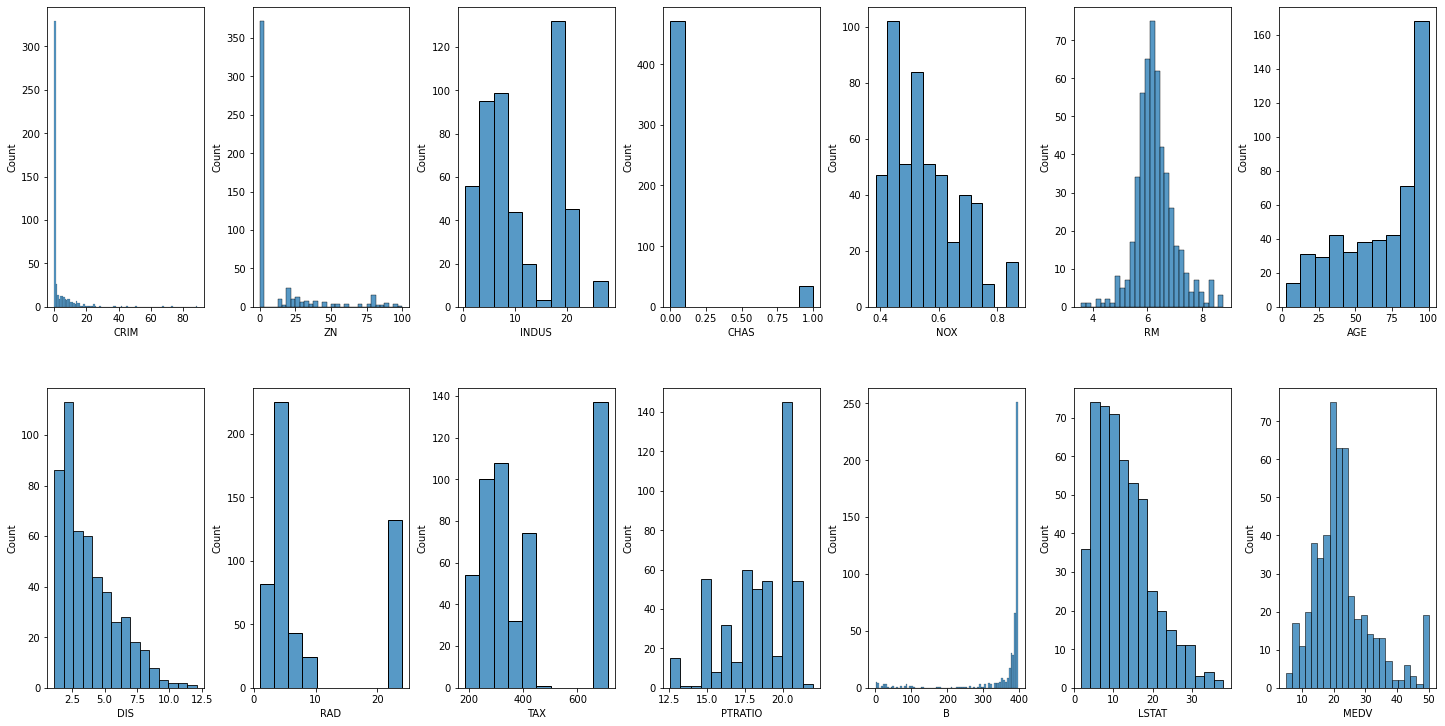

In [4]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

De lo anterior, se puede observar que las únicas variables que tienen una forma simétrica son las variables RM Y MEDV

# Regresión lineal

Veamos como se ve la relación entre la variable $Y$ y algunas $Xs$

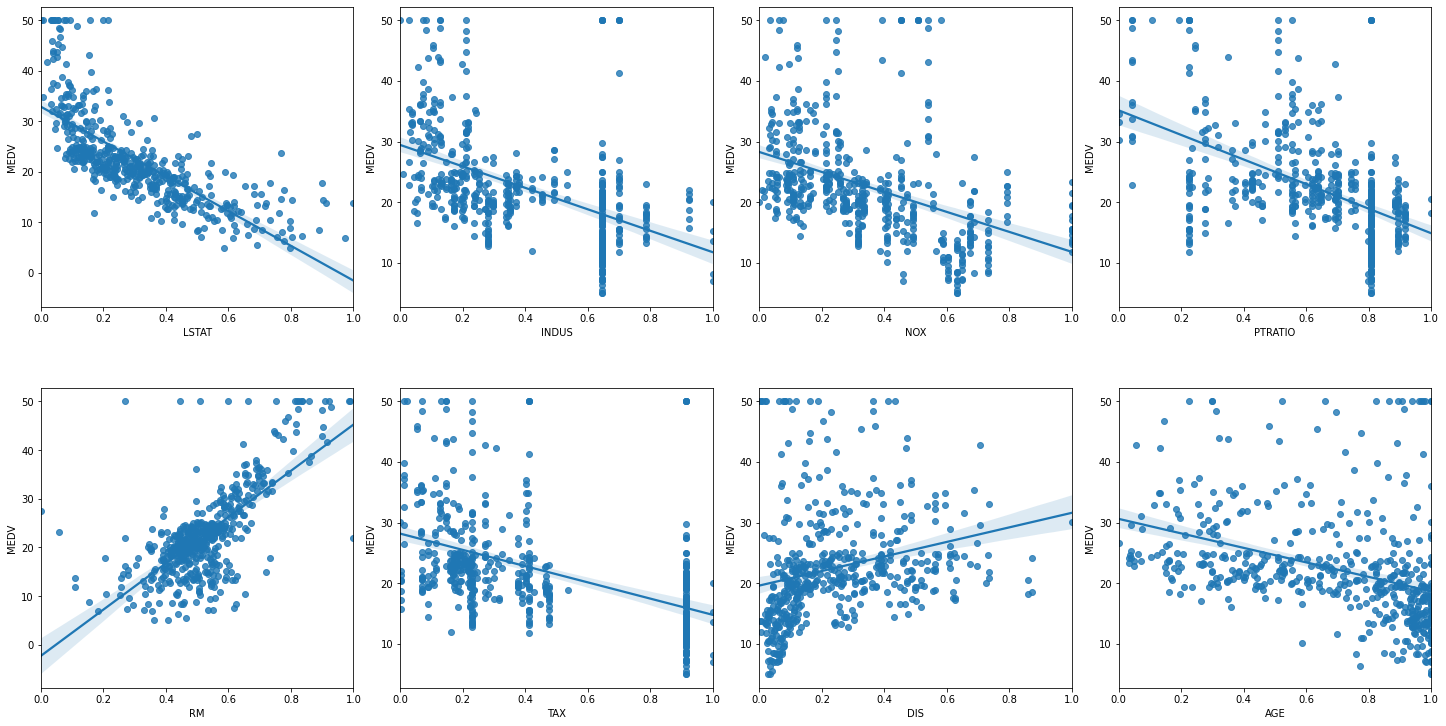

In [5]:
# Escalamiento de las variables X's
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

In [7]:
RL = LinearRegression()
RL.fit(X_train, y_train)

LinearRegression()

In [8]:
# validación cruzada
cv_linear = cross_val_score(estimator = RL, X = X_train, y = y_train, cv = 10)

#  R2   Train set 
y_pred_linear_train = RL.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

#  R2 Score Test set 
y_pred_linear_test = RL.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

#  RMSE  Test set 
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.6798849928646797
R2_score (train):  0.7295569173868439
R2_score (test):  0.5862459459644946
RMSE:  5.312271611453976


Del anterior modelo se puede observar que el $R^2$ no es muy bueno, intentemos con otro modelo.

# Regresión polinomial 

In [9]:
pol_reg = PolynomialFeatures(degree = 2) # Grado 2
X_pol = pol_reg.fit_transform(X_train)
pol_reg.fit(X_pol, y_train)
reg_pol2 = LinearRegression()
reg_pol2.fit(X_pol, y_train)

LinearRegression()

In [10]:
# validación cruzada
cv_pol2 = cross_val_score(estimator = reg_pol2, X = X_train, y = y_train, cv = 10)

#  R2   Train set ts
y_pred_poly2_train = reg_pol2.predict(pol_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

#  R2 Score Test set 
y_pred_poly2_test = reg_pol2.predict(pol_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

#  RMSE  Test set 
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_pol2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.6798849928646797
R2_score (train):  0.893383244571158
R2_score (test):  0.7688035126114745
RMSE:  3.970998807895103


Como se puede observar, este modelo es un poco mejor en comparación al anterior.

# Medición del error

In [11]:
models = [('Regresión lineal', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Regresión polinomial ', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_pol2.mean()),  
         ]

In [12]:
predict = pd.DataFrame(data = models, columns=['Modelo', 'RMSE', 'R2(training)', 'R2(test)', 'Validación cruzada'])
predict

,Modelo,RMSE,R2(training),R2(test),Validación cruzada
0,Regresión lineal,5.312272,0.729557,0.586246,0.679885
1,Regresión polinomial,3.970999,0.893383,0.768804,0.679885


Como se habia dicho anteriormente el modelo de regresión polinomial es ligeramente mejor que el de regresión lienal.

# Fuentes

[Boston Housing Regression Analysis](http://www.limni.net})

[The Boston Housing Dataset](http://www.limni.net})